# Vertex Cover Problem
### Description
The Vertex Cover Problem (VCP) is a well-known problem with a lot of utility in the real world.
The problem implies covering as much edges as possible using as little vertices as possible.

### Utility in the real world
The solution of Vertex Cover Problem can be used to solve important real-life problems, using basically the same "blue-print". Some of them are:
- Optimizing communication networks. We can assume that a point of controll of the network is a vertex, and then the goal is to monitor the whole network (***maximizing edges***) with as little resources as possible (***minimizing vertices***).
- Urban planification and infrastructure development. We can imagine that edges are the roads, and we need to find where to build different important buildings (vertices)
- Traffic surveilence. Same as before, we can imagine that edges are the roads, but now at the intersection of those roads (vertices) we want to install cameras and sensors to survey the traffic.

# Initialize the problem
We will import the necessary libraries and create a graph at random that will be used to compare the ***Genetic Evolution Algorithm*** and the ***Discrete Particle Swarm Optimization***.

To run the program the following libraries are required:
- Networkx
- Numpy
- Matplotlib
- PrettyTable
- Scipy (required for generating a graph with many vertices)

In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from algorithms.genetic_algorithm import GeneticAlgorithm
from algorithms.discrete_particle_swarm_optimization import DPSO
from utils.metrics import show_metrics, show_solution, compare_metrics
import time

# Population size, number of iterations to be used for both algorithms
population = 100
generations = 500

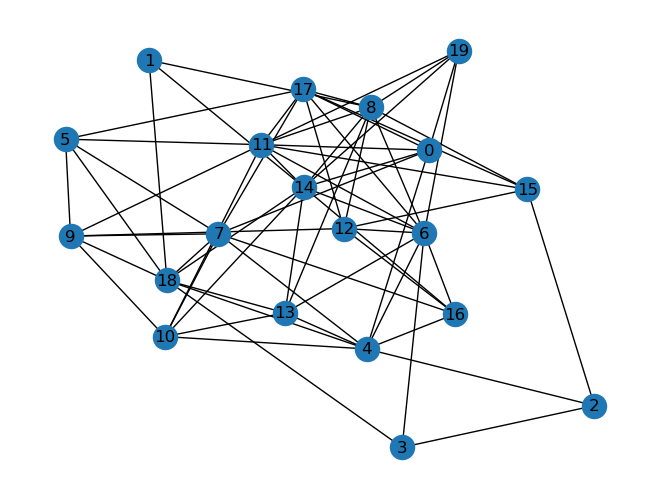

In [2]:
generated_graph = nx.gnp_random_graph(20, 0.3) # number of vertices, change of edge between two vertices

pos = nx.spring_layout(generated_graph)
nx.draw(generated_graph, pos, with_labels=True)
plt.show()

In [3]:
# Initialize the fitness function that will be used for both algorithms

def fitness_func(solution: np.ndarray) -> int:
    selected_vertices = np.where(solution == 1)[0]  # We extract the active vertex from the current individual
    covered_edges = set()
    
    for vertex in selected_vertices:
        for neighbour in generated_graph.neighbors(vertex):
            if (vertex, neighbour) in generated_graph.edges() or \
                    (neighbour, vertex) in generated_graph.edges():
                # We add the edge that we covered, keeping the order in our set to avoid duplicates.
                covered_edges.add((vertex, neighbour) if vertex < neighbour else (neighbour, vertex))

    # We must penalize according to the number of used vertices, we want the minimum
    fitness = len(covered_edges) - len(selected_vertices)

    # There may be cases when not every vertix is connected with the other vertices (directly or indirectly), so it's needed
    # to check if every connex component is covered correctly
    components = list(nx.connected_components(generated_graph))
    
    # We will do this check only if there are more than 1 connex component
    if len(components) > 1:
        for component in components:
            exists_at_least_one = False
            for vertex in component:
                # If there is any vertex from a connex component that it's not in our solution, we issue a penalty later
                if vertex in selected_vertices:
                    exists_at_least_one = True
            
            if not exists_at_least_one:
                fitness -= 1337 * 100 # And as promise, we issue a penalty
                break

    # Remember, we need to cover every edge, so we will penalize solutions that don't
    # respect this requirement
    if len(covered_edges) != generated_graph.number_of_edges():
        fitness -= 1337 * 100

    return fitness

# Genetic Evolution Algorithm
When using the Genetic Evolution Algorithm (GA for short) we will store our result for the problem as a binary sequence that is equal to the number of vertices, but why?
Well, we do this because in this way we can easily represent what vertices are used, for example if we have a graph with 5 vertices then a possible solution for the VCP will look something like this: [0, 1, 1, 0, 1];
Ok, that's the easy, but where the evolution does take place? Let's forget that [0, 1, 1, 0, 1] it's a binary sequence, let's imagine it's DNA. From the evolution theory it's known that if two creatures mate they will produce a new creature that will share parts of their DNA, or even mutate and gain "new features". Of course in real-life it's more than that, and the process of evolution expands over bilion of years. Ok, now let's get back to our binary sequences, if we imagine them as DNA we can initialize our own "species of creatures" and breed them. 
Breeding them will result in obtaining a solution for our problem, but how?
We will calculate using a ***fitness function*** how good they are at the "life they live", what do I mean by that? I'm just saying that we are going to calculate how good is their DNA, their DNA being the soultion for our problem. And one more thing, we will add an "elitism" factor, what does this mean? It means we will keep a predefined number of our best candidates to the future generation (basically the elites).

These are the steps for the GA:
1. Initialize a population of a desired size.
2. Create a loop for a desired number of generations.
3. Calculate the fitness of each individual, store the best in a list.
4. Breed them, check if the children will mutate (a random chance) and change them accordingly.
5. Go to the next generation
6. When the loop is complete, from the list with the best individuals in each generation, select the best of all time.
7. Enjoy your result to the problem.

In [4]:
genetic_algorithm = GeneticAlgorithm(generated_graph.number_of_nodes(), population, generations, 0.3, 5, 2, fitness_func)
ga_start_time = time.time()

genetic_algorithm.run()

ga_end_time = time.time()

ga_run_time = ga_end_time - ga_start_time

Current generation 0/500
Current generation 10/500
Current generation 20/500
Current generation 30/500
Current generation 40/500
Current generation 50/500
Current generation 60/500
Current generation 70/500
Current generation 80/500
Current generation 90/500
Current generation 100/500
Current generation 110/500
Current generation 120/500
Current generation 130/500
Current generation 140/500
Current generation 150/500
Current generation 160/500
Current generation 170/500
Current generation 180/500
Current generation 190/500
Current generation 200/500
Current generation 210/500
Current generation 220/500
Current generation 230/500
Current generation 240/500
Current generation 250/500
Current generation 260/500
Current generation 270/500
Current generation 280/500
Current generation 290/500
Current generation 300/500
Current generation 310/500
Current generation 320/500
Current generation 330/500
Current generation 340/500
Current generation 350/500
Current generation 360/500
Current gene

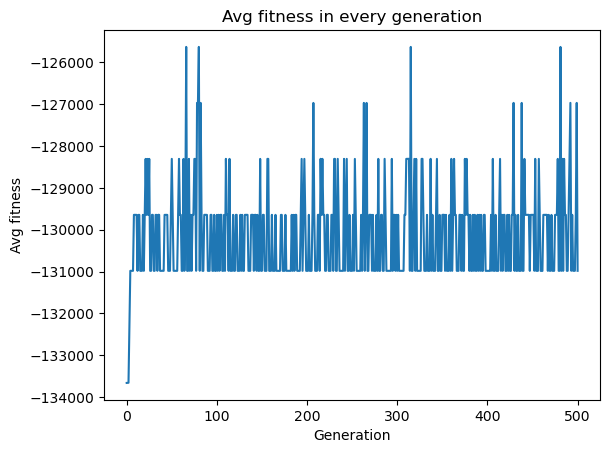

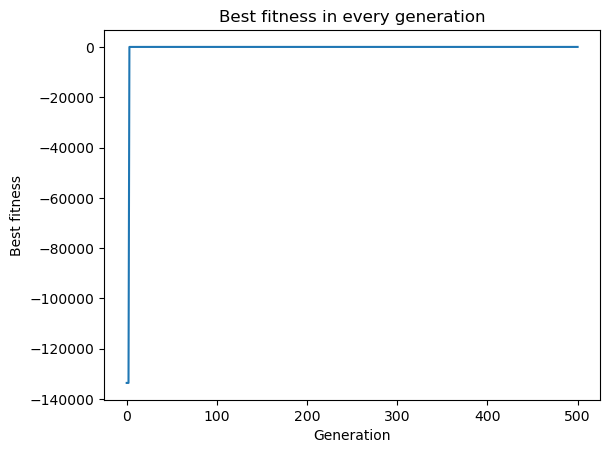

+------------+-------------------------------------------+
| Generation |                 Individual                |
+------------+-------------------------------------------+
|     0      | [1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1] |
|     1      | [0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0] |
|     2      | [0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0] |
|     3      | [1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1] |
|     4      | [0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1] |
|     5      | [0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1] |
|     6      | [0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1] |
|     7      | [0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1] |
|     8      | [0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1] |
|     9      | [1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0] |
|     10     | [1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0] |
|     11     | [1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0] |
|     12     | [1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0] |
|     13     | [1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0]

In [5]:
# We show the metrics
show_metrics(genetic_algorithm.avg_fitness_evolution, genetic_algorithm.best_fitness_evolution, genetic_algorithm.best_individual_evolution)

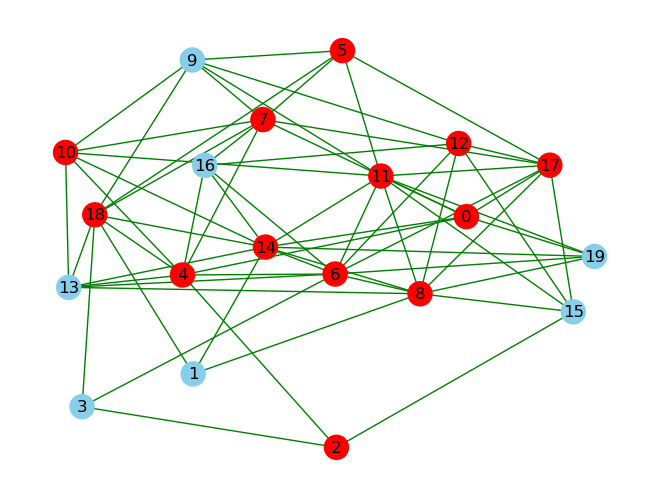

The best individual is [1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0] with a fitness of 52


In [6]:
# We show the solution
show_solution(generated_graph, genetic_algorithm.best_individual_oat, genetic_algorithm.best_fitness_value_oat)

# Discrete Particle Swarm Optimization Algorithm
Before we will talk about the discrete implementation of this algorithm, we must first talk about the continuous one. This meta-heuristic algorithm is inspired from real life, and how it's working basically it's that we have an entity (particle) that will move continuously towards a global best and it's personal best. But what are those ***global best*** and ***personal best***, well you see, there is not only one particule, there is a whole population of them, and they will influence eachother paths trying to find the ***best solution***. But what is the best solution? How do we know that the current position is closer to the best solution than the others? Using a ***fitness function*** or also called ***objective function*** we will calculate how ***good*** it's a particle solution, and if it's better than all of the other solutions, then this solution will influence other particles.
Previously we disscussed the ***Genetic Evolution Algorithm*** and yes, this is faster, but not as accurate (well, the difference is not that big, we'll see later on the graphs), but why? Well this algorithm is influenced by random factors during it's proccess, also it's required to calibrate the constant parameters based on the problem that it's needed to be solved, you'll need a balance between on how much the previous velocity affects the current one, how much do you want a particle to relay on its own experience (personal best) and how much do you want it to relay on the global experience (global best), and this can differ from case to case, if you have a complex graph (and not random, we do it randomly using networkx library, so you should try it maybe on a graph of your own, complex or not) you can analize it first, and think about what strategy do you want to try, or just do it by trial and error and see what parameters gives you a better result. Usually for a best result on a graph at first sight you will want to use machine learning to train this program, then the results will be more accurate, the ML program will find a sweet-spot for the parameters to give a good response overall.
But we didn't disccused yet about something, how we adapt this problem to be discrete? It's pretty simple, we will use a sigmoid function to transform the velocity into a number between [0, 1], and then use that number as a probability to change our current position, if you are more curious about this, you should look at the code, it's also explained there how it works.
There are the steps for the DPSO Algorithm:
1. Create the initial population
2. Create the velocities
3. Define the constants c1, c2, w (explained in the code)
4. Initiate the personal best and the global best
5. Enter in a loop for a predefined number of iterations
6. Pass through each particle in the population
7. Calculate the velocity
8. Use the sigmoid to get the new position through probabilites
9. Update personal best, global best if necessary
10. Repet until you reach the maximum iterations
11. Enjoy your result

In [7]:
dpso_algorithm = DPSO(generated_graph.number_of_nodes(), population, generations, 0.30, 0.50, 0.30, fitness_func)

dpso_start_time = time.time()

dpso_algorithm.run()

dpso_end_time = time.time()

dpso_run_time = dpso_end_time - dpso_start_time

Current iteration 0/500
Current iteration 10/500
Current iteration 20/500
Current iteration 30/500
Current iteration 40/500
Current iteration 50/500
Current iteration 60/500
Current iteration 70/500
Current iteration 80/500
Current iteration 90/500
Current iteration 100/500
Current iteration 110/500
Current iteration 120/500
Current iteration 130/500
Current iteration 140/500
Current iteration 150/500
Current iteration 160/500
Current iteration 170/500
Current iteration 180/500
Current iteration 190/500
Current iteration 200/500
Current iteration 210/500
Current iteration 220/500
Current iteration 230/500
Current iteration 240/500
Current iteration 250/500
Current iteration 260/500
Current iteration 270/500
Current iteration 280/500
Current iteration 290/500
Current iteration 300/500
Current iteration 310/500
Current iteration 320/500
Current iteration 330/500
Current iteration 340/500
Current iteration 350/500
Current iteration 360/500
Current iteration 370/500
Current iteration 380/5

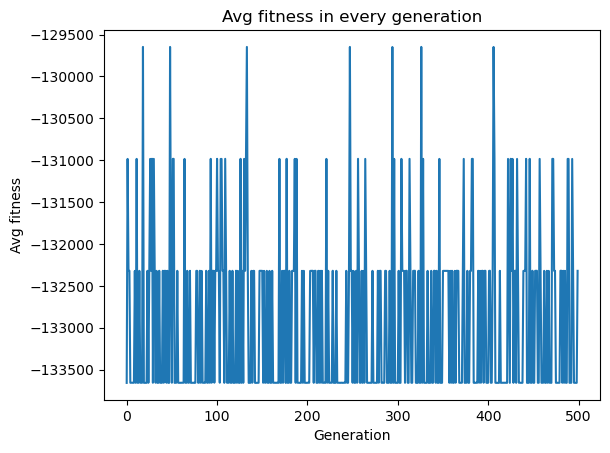

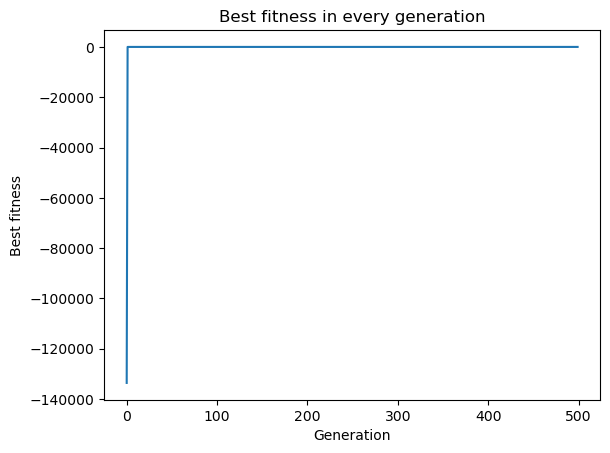

+------------+-------------------------------------------+
| Generation |                 Individual                |
+------------+-------------------------------------------+
|     0      | [1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0] |
|     1      | [1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0] |
|     2      | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     3      | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     4      | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     5      | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     6      | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     7      | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     8      | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     9      | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     10     | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     11     | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     12     | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1] |
|     13     | [1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1]

In [8]:
# Show the metrics
show_metrics(dpso_algorithm.avg_fitness_evolution, dpso_algorithm.best_fitness_evolution, dpso_algorithm.best_particle_evolution)

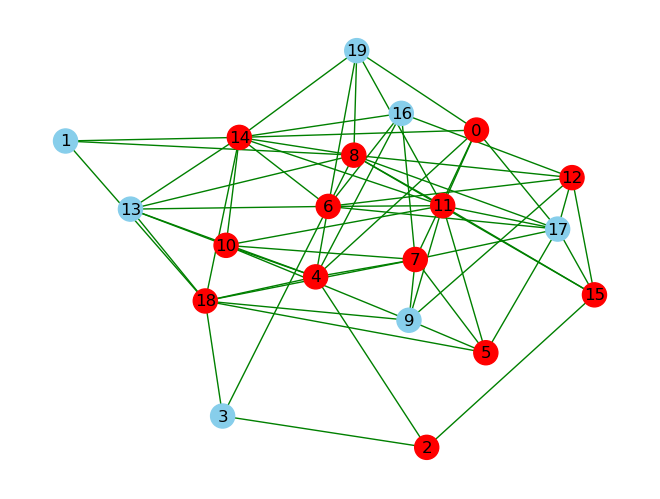

The best individual is [1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0] with a fitness of 52


In [9]:
# We show the solution
show_solution(generated_graph, dpso_algorithm.global_best, dpso_algorithm.global_best_fitness)

# DSPO VS GA
There will be only comparasions realised with matplotlib, we disscused already some of their differences when DSPO was presented.
From the graphs we can observe that:
- DPSO is much faster.
- Sometimes both of them converge pretty fast, sometimes GA is better (can be seen by running different examples).
- Avg fitness of the GA is better, so the final solution is sometimes a little better than the one from DPSO.
- Both of them can sometimes fail to cover all the vertices (To fix that you need to mess around with the parameters, or run multiple tests on the same graph).

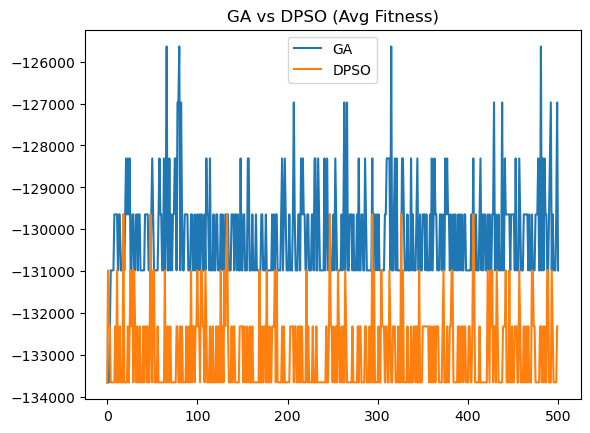

In [10]:
compare_metrics(genetic_algorithm.avg_fitness_evolution, dpso_algorithm.avg_fitness_evolution, "GA", "DPSO", "GA vs DPSO (Avg Fitness)")

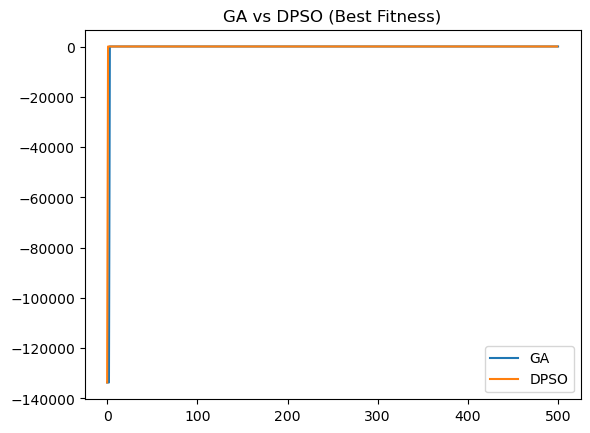

In [11]:
compare_metrics(genetic_algorithm.best_fitness_evolution, dpso_algorithm.best_fitness_evolution, "GA", "DPSO", "GA vs DPSO (Best Fitness)")

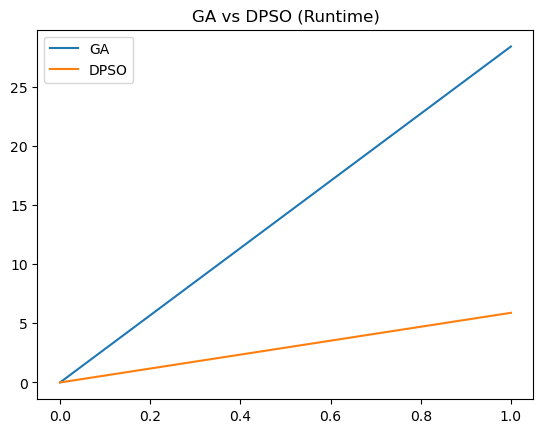

In [12]:
compare_metrics([0, ga_run_time], [0, dpso_run_time], "GA", "DPSO", "GA vs DPSO (Runtime)")

## Comparasion on multiple random graphs
The following comparasions will show how accurate are these two algorithms on 10 test cases with random graphs that contains between 30 and 100 vertices, also the runtime will be shown. It's a fun way to benchmark them, but really, if you want to get the best result for a graph, you should run multiple tests (or more iterations) with a big population on that graph using the both algorithms. Now it really depends on the task required to be solved, if you need real-time solutions for VCP, well using these algorithms it's not a really good ideea.

==================[TEST 0]==================
NUMBER OF VERTICES: 31


> RUNNING GENETIC ALGORITHM
Current generation 0/500
Current generation 10/500
Current generation 20/500
Current generation 30/500
Current generation 40/500
Current generation 50/500
Current generation 60/500
Current generation 70/500
Current generation 80/500
Current generation 90/500
Current generation 100/500
Current generation 110/500
Current generation 120/500
Current generation 130/500
Current generation 140/500
Current generation 150/500
Current generation 160/500
Current generation 170/500
Current generation 180/500
Current generation 190/500
Current generation 200/500
Current generation 210/500
Current generation 220/500
Current generation 230/500
Current generation 240/500
Current generation 250/500
Current generation 260/500
Current generation 270/500
Current generation 280/500
Current generation 290/500
Current generation 300/500
Current generation 310/500
Current generation 320/500
Current generation 330

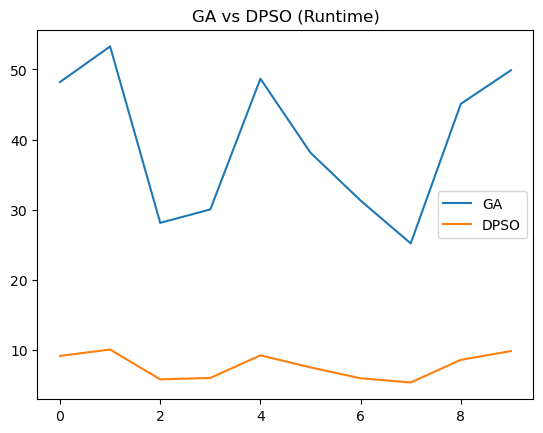

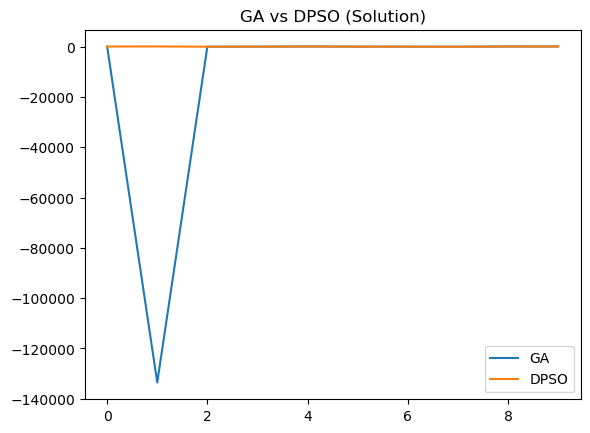

In [13]:
from utils.performance import perforamnce_test
perforamnce_test(10, 20, 35, 100, 500)